<a href="https://colab.research.google.com/github/enino84/Data-Assimilation-2022/blob/main/DA_Prior_Likelihood_Posterior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import display, Latex
import sympy as sp
import sympy.stats as st
import sympy.plotting as pls
from sympy.parsing.sympy_parser import parse_expr
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# **Prior, Likelihood, Posterior**

Posterior $$\mathcal{P} \left( x \vert y \right) \propto \mathcal{P} \left( x  \right) \cdot \mathcal{L} \left( x \vert y \right)\,,$$
Our prior reads:
$$\mathcal{P} \left( x \right) \propto \exp \left ( -\frac{1}{2} \cdot \frac{\left (  x-x^b\right)^2}{\sigma_b^2} \right)\,,$$
our likelihood equals:
$$\mathcal{P} \left( x \vert y \right) \propto \exp \left ( -\frac{1}{2} \cdot \frac{\left (  y-x\right)^2}{\sigma_o^2} \right)\,,$$

NormalDistribution(0, 3)
sqrt(2)*exp(-x**2/18)/(6*sqrt(pi))


<IPython.core.display.Latex object>

NormalDistribution(1, 1)
sqrt(2)*exp(-(x - 1)**2/2)/(2*sqrt(pi))


<IPython.core.display.Latex object>

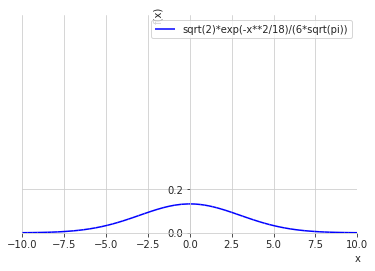

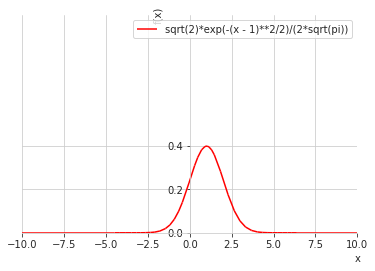

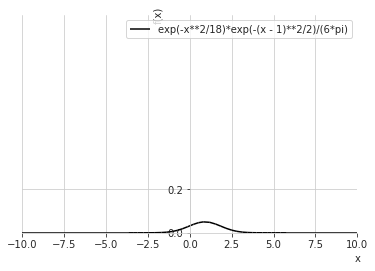

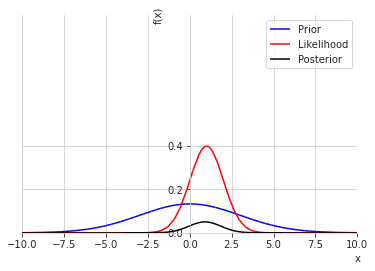

In [ ]:
x = parse_expr('x');
xb = 0; sig_b = 3; y = 1; sig_o = 1;
prior = st.Normal('z',xb,sig_b);
den_prior = st.density(prior);
pdf_prior = den_prior.pdf(x);
print(den_prior)
print(pdf_prior)
display(Latex('\mathcal{P}(x) = '+sp.latex(pdf_prior)))

like = st.Normal('z',y,sig_o);
den_like = st.density(like);
pdf_like = den_like.pdf(x);
print(den_like)
print(pdf_like)
display(Latex('\mathcal{L}\left (x \\vert y \\right ) = '+sp.latex(pdf_like)))

pdf_pos = pdf_prior*pdf_like;

sns.set_style('whitegrid')
pdf_plots = pls.plot(pdf_prior,line_color='b',legend=True,label='Prior')
pdf_plots.extend(pls.plot(pdf_like,line_color='r',legend=True,label='Prior'));
pdf_plots.extend(pls.plot(pdf_pos,line_color='k',legend=True,label='Prior'));
pdf_plots[0].label='Prior';
pdf_plots[1].label='Likelihood';
pdf_plots[2].label='Posterior';
pdf_plots.show()


$$x^a = \arg \max_{x} \mathcal{P} (x\vert y) \equiv x^a = \arg \min_x \mathcal{J}(x) \,,$$
wherein:
$$\mathcal{J}(x) =\frac{1}{2} \cdot \frac{(x-x^b)^2}{\sigma_b^2} + \frac{1}{2} \cdot \frac{(y-x)^2}{\sigma_o^2}$$

NormalDistribution(0, 3)
sqrt(2)*exp(-x**2/18)/(6*sqrt(pi))


<IPython.core.display.Latex object>

NormalDistribution(1, 1)
sqrt(2)*exp(-(x - 1)**2/2)/(2*sqrt(pi))


<IPython.core.display.Latex object>

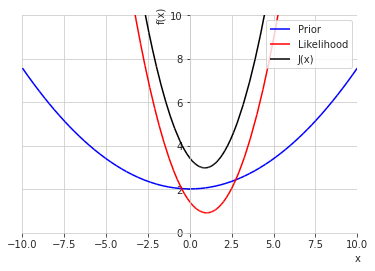

In [ ]:
x = parse_expr('x');
xb = 0; sig_b = 3; y = 1; sig_o = 1;
prior = st.Normal('z',xb,sig_b);
den_prior = st.density(prior);
pdf_prior = den_prior.pdf(x);
print(den_prior)
print(pdf_prior)
display(Latex('\mathcal{P}(x) = '+sp.latex(pdf_prior)))

like = st.Normal('z',y,sig_o);
den_like = st.density(like);
pdf_like = den_like.pdf(x);
print(den_like)
print(pdf_like)
display(Latex('\mathcal{L}\left (x \\vert y \\right ) = '+sp.latex(pdf_like)))

pdf_pos = pdf_prior*pdf_like;

sns.set_style('whitegrid')
pdf_plots = pls.plot(-sp.log(pdf_prior),line_color='b',legend=True,show=False,label='Prior')
pdf_plots.extend(pls.plot(-sp.log(pdf_like),line_color='r',legend=True,show=False,label='Prior'));
pdf_plots.extend(pls.plot(-sp.log(pdf_pos),line_color='k',legend=True,show=False,label='Prior'));
pdf_plots[0].label='Prior';
pdf_plots[1].label='Likelihood';
pdf_plots[2].label='J(x)';
pdf_plots.ylim=[0,10]
pdf_plots.show()